In [1]:
# TOOLS PREPARATION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [7]:
# Loading the dataset
adv = pd.read_csv("advertising.csv")
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [8]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
adv.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [11]:
adv.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [12]:
adv.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Text(0, 0.5, 'Count')

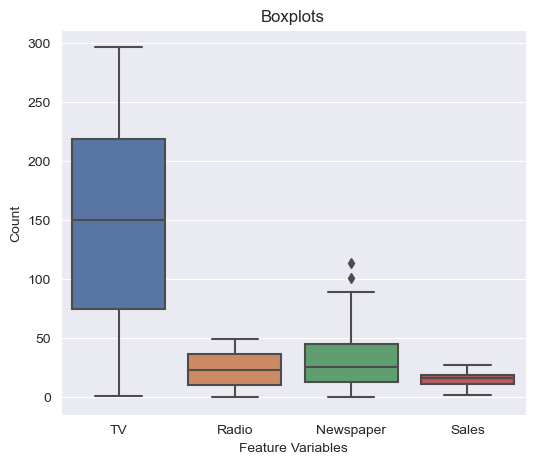

In [10]:
# looking for outliers through boxplot
sns.set({"figure.figsize":(6,5)})
sns.boxplot(adv)
plt.title("Boxplots")
plt.xlabel("Feature Variables")
plt.ylabel("Count")

In [9]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


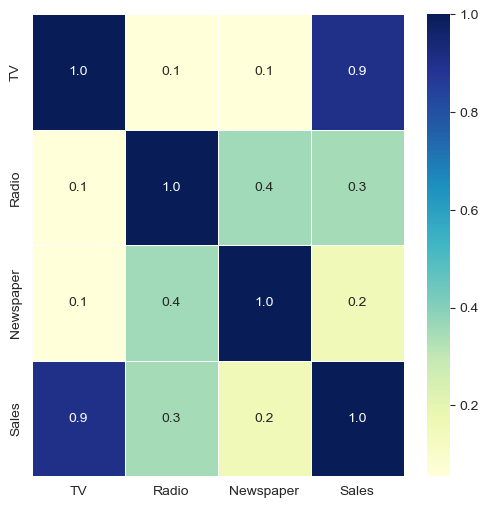

In [13]:
corr_map = adv.corr()
home, room = plt.subplots(figsize = (6,6))
room = sns.heatmap(corr_map,
                   
                  annot = True,
                  linewidth = 0.5,
                  fmt = "0.1f",
                  cmap = "YlGnBu")

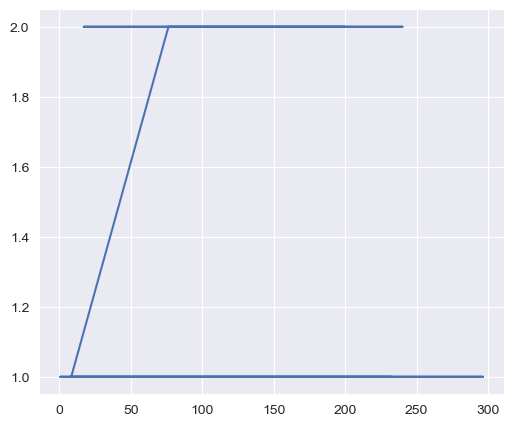

In [20]:
plt.plot(adv['TV'].value_counts())

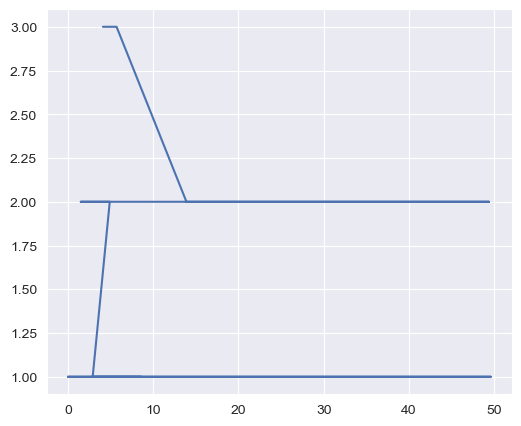

In [21]:
plt.plot(adv['Radio'].value_counts())

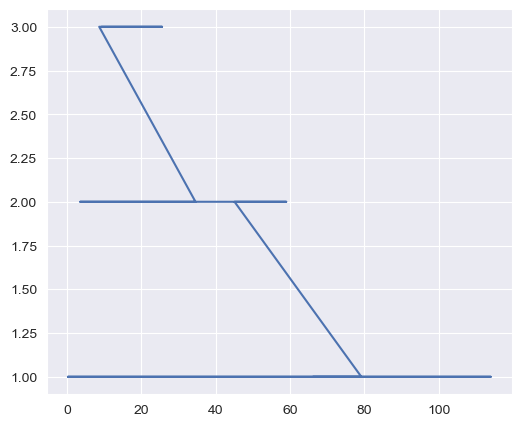

In [22]:
plt.plot(adv['Newspaper'].value_counts())

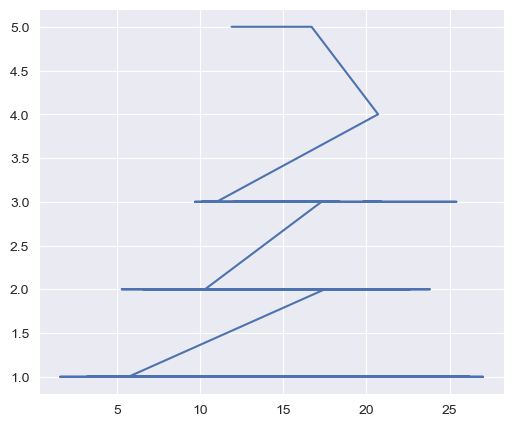

In [23]:
plt.plot(adv['Sales'].value_counts())

(<Axes: ylabel='Frequency'>,
 <Axes: ylabel='Frequency'>,
 <Axes: ylabel='Frequency'>,
 <Axes: ylabel='Frequency'>)

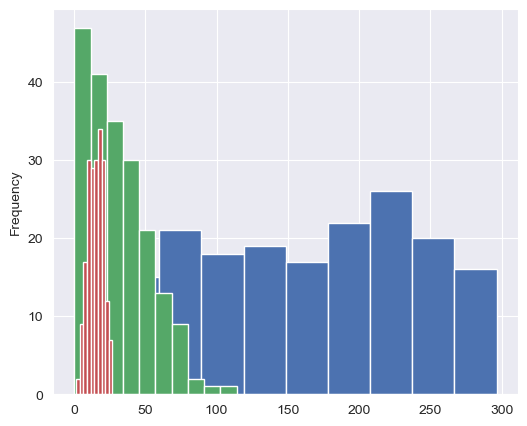

In [28]:
adv.TV.plot.hist(),adv.Radio.plot.hist(),adv.Newspaper.plot.hist(),adv.Sales.plot.hist()

# Modeling

In [92]:
# importing sklearn tools and libraries
#As we know this is a regression problem
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(7)
# splitting the data into X and y
X = adv.drop('Sales', axis = 1 )
y = adv['Sales']

# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.22)

# Creating the Instance
Reg = RandomForestRegressor()

# Fitting the Model
Reg.fit(X_train,y_train)

RandomForestRegressor()

In [93]:
Reg.score(X_train, y_train)

0.9920080398642118

In [94]:
Reg.score(X_test, y_test)

0.9338069125345573

In [95]:
## Evaluate Model
predicted_Y = Reg.predict(X_test)
predicted_Y

array([12.006, 13.495,  6.387, 18.202,  9.563,  8.009,  7.394, 12.554,
        8.463, 14.426,  6.223, 16.748, 10.035, 11.022, 17.847,  5.096,
       10.932, 15.555, 18.558, 11.741, 16.722, 21.769, 12.012, 17.837,
       11.653, 18.845, 22.213, 17.659, 19.144, 17.504, 12.892,  7.237,
       17.924, 22.526, 20.019, 19.086,  5.357, 25.183, 11.933, 12.078,
       10.167, 23.301,  9.269, 16.273])

# Model is giving greater than 90% score which is well and good 